In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
files = ['Americium_0degrees_200s_CdTe_uncal.mca','Americium_90degrees_200s_CdTe_uncal.mca',
         'Cesium_0degrees_600s_CdTe_uncal.mca', 'Barium_0degrees_300s_CdTe_uncal.mca', 'Cobalt_0degrees_600s_CdTe_uncal.mca']
background = pd.read_csv("CdTe\Background_0degrees_600s_CdTe.mca",
                   header=11, skipfooter=73 , names=['counts'], encoding= "ISO-8859-1", engine='python')
data=[]
for i in range(5):
    data.append(pd.read_csv(f"CdTe/{files[i]}",
                   header=11, skipfooter=73, names=['counts'], encoding= "ISO-8859-1", engine='python'))

In [10]:
data[4]

,counts
0,0
1,0
2,0
3,0
4,0
...,...
2043,0
2044,0
2045,0
2046,0


In [11]:
channels = np.arange(1,2049)
channels

array([   1,    2,    3, ..., 2046, 2047, 2048])

In [12]:
#this code is not too important, just finds the channels that recive counts in background,
#used for making sure that background was removed properly
l=[]
d=[]
for i,x in enumerate(background['counts']):
    if x>0:
        l.append(i)

In [13]:
#this will remove background counts, /3 because of time difference (need to account for different times)
#should find a way to make sure that there are no values below 0 counts|
dataCorr = data[0]['counts']-background['counts']/3

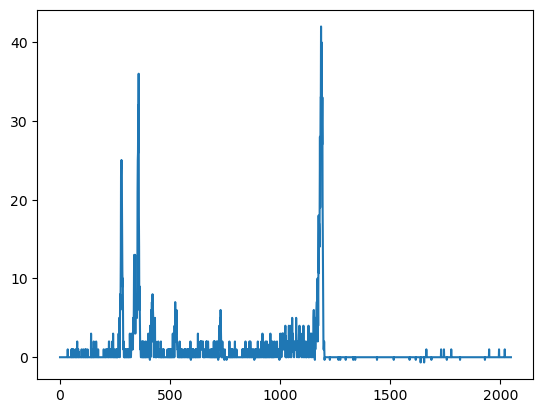

In [17]:
plt.plot(channels,dataCorr);
plt.show()